In [1]:
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("data/master.csv")

In [3]:
data.head(8)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
data['year'].value_counts().sort_index()

1985     576
1986     576
1987     648
1988     588
1989     624
1990     768
1991     768
1992     780
1993     780
1994     816
1995     936
1996     924
1997     924
1998     948
1999     996
2000    1032
2001    1056
2002    1032
2003    1032
2004    1008
2005    1008
2006    1020
2007    1032
2008    1020
2009    1068
2010    1056
2011    1032
2012     972
2013     960
2014     936
2015     744
2016     160
Name: year, dtype: int64

In [5]:
data = data[(data['year'] <= 2014) & (data['year'] >= 1995)]
data['year'].value_counts().sort_index()

1995     936
1996     924
1997     924
1998     948
1999     996
2000    1032
2001    1056
2002    1032
2003    1032
2004    1008
2005    1008
2006    1020
2007    1032
2008    1020
2009    1068
2010    1056
2011    1032
2012     972
2013     960
2014     936
Name: year, dtype: int64

In [6]:
# Delete columns we don't need
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
data = data.drop(['country-year', 'HDI for year',\
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'], axis=1)

In [8]:
data.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop
72,Albania,1995,male,25-34 years,13,232900,5.58
73,Albania,1995,male,55-74 years,9,178000,5.06
74,Albania,1995,female,75+ years,2,40800,4.90
75,Albania,1995,female,15-24 years,13,283500,4.59
76,Albania,1995,male,15-24 years,11,241200,4.56


In [9]:
# Make age column better sortable and rename cell values accordingly
data['age'].value_counts()

15-24 years    3332
75+ years      3332
35-54 years    3332
5-14 years     3332
55-74 years    3332
25-34 years    3332
Name: age, dtype: int64

In [10]:
def make_age_sortable(row):
    if row == '5-14 years':
        return '0 - 5-14 years'
    if row == '15-24 years':
        return '1 - 15-24 years'
    if row == '25-34 years':
        return '2 - 25-34 years'
    if row == '35-54 years':
        return '3 - 35-54 years'
    if row == '55-74 years':
        return '4 - 55-74 years'
    if row == '75+ years':
        return '5 - 75+ years'

In [11]:
data['age'] = data['age'].apply(make_age_sortable)

In [12]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop
72,Albania,1995,male,2 - 25-34 years,13,232900,5.58
73,Albania,1995,male,4 - 55-74 years,9,178000,5.06
74,Albania,1995,female,5 - 75+ years,2,40800,4.90
75,Albania,1995,female,1 - 15-24 years,13,283500,4.59
76,Albania,1995,male,1 - 15-24 years,11,241200,4.56


In [13]:
data = data.sort_values(['country', 'year', 'age', 'sex'])

In [14]:
grouped_by_country = data[['country', 'year']].groupby('country').count().sort_values(by='year', ascending=False)
grouped_by_country.head()

,year
country,
Kuwait,240
Slovenia,240
Sweden,240
Germany,240
Republic of Korea,240


In [15]:
# Get all countries with complete values from 1995 - 2014
# Alle countries with complete data have 240 rows for each year
grouped_by_country[grouped_by_country['year'] == 240]
list_of_countries = grouped_by_country[grouped_by_country['year'] == 240].index.tolist()
list_of_countries

['Kuwait',
 'Slovenia',
 'Sweden',
 'Germany',
 'Republic of Korea',
 'Suriname',
 'Guatemala',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Spain',
 'Japan',
 'Kazakhstan',
 'Kyrgyzstan',
 'Finland',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Mauritius',
 'Mexico',
 'Singapore',
 'Netherlands',
 'Norway',
 'Saint Vincent and Grenadines',
 'Paraguay',
 'Russian Federation',
 'Puerto Rico',
 'France',
 'Greece',
 'Switzerland',
 'Chile',
 'Argentina',
 'Austria',
 'United States',
 'United Kingdom',
 'Belgium',
 'Estonia',
 'Turkmenistan',
 'Brazil',
 'Bulgaria',
 'Belize',
 'Colombia',
 'Cuba',
 'El Salvador',
 'Ecuador',
 'Denmark',
 'Czech Republic',
 'Romania',
 'Croatia',
 'Costa Rica']

In [16]:
data_complete = data[data['country'].isin(list_of_countries)]

In [17]:
data_complete = data_complete.groupby(['country', 'year'])[['population','suicides_no']].sum()

In [18]:
data_complete['percent'] = (data_complete['suicides_no'] / data_complete['population']) * 100
final = data_complete.groupby(['year'])['percent'].mean().reset_index()

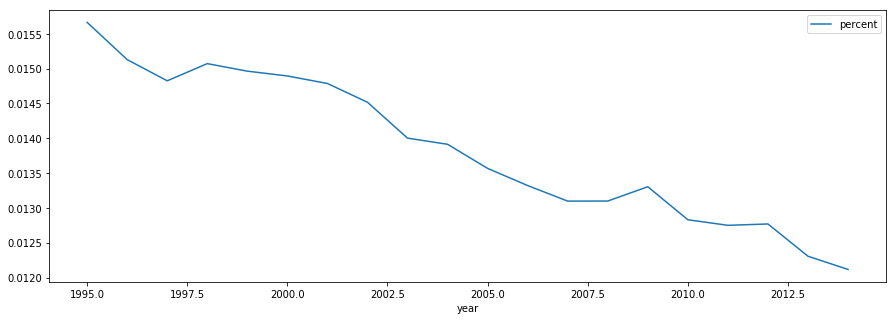

In [19]:
final.plot(x='year', y='percent', rot=0, figsize=(15,5))

### On first glance it looks like in sum, the suicide-rates for the measured countries is going down.